In [56]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
import librosa.display
import noisereduce as nr
import numpy as np
import datetime
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import csv


In [2]:
# Ruta a la carpeta con los archivos de audio
folder_path = "./Dataset-Birds/training/"

# Obtener la lista de archivos en la carpeta
file_list = os.listdir(folder_path)
# Filtrar la lista para obtener solo los archivos de audio
audio_files = [file for file in file_list if file.endswith('.wav')]

# Crear una lista de diccionarios con etiqueta y ruta
data = []
for audio_file in audio_files:
    label, _ = audio_file.split('.', 1)
    data.append({'label': label, 'path': os.path.join(folder_path, audio_file)})

# Crear el DataFrame
df = pd.DataFrame(data)

# Mostrar el DataFrame
# print(df)


class_scientificnames = df['label'].unique()
class_commonnames = [
    "Amazona Frentirroja",
    "Picamaderos de Guayaquil",
    "Tinamú Cejudo",
    "Chachalaca Cabecirrufa",
    "Busardo Dorsigrís",
    "Aratinga de Guayaquil",
]
print(class_scientificnames)
print(df['label'].value_counts())


['Amazona Autamnails' 'Campephilus gayaquilensis'
 'Crypturellus tansfasciatus' 'Ortalis erythroptera'
 'Pseudastur occidentalis' 'Psittacara erythrogenys']
label
Amazona Autamnails            682
Psittacara erythrogenys       522
Ortalis erythroptera          402
Campephilus gayaquilensis     187
Crypturellus tansfasciatus    165
Pseudastur occidentalis        89
Name: count, dtype: int64


In [3]:
def createSegmentationVectorPredict(segment_dur_secs, signal, sr, split):
    segment_length = sr * segment_dur_secs
    for s in range(0, len(signal), segment_length):
        t = signal[s : s + segment_length]
        split.append(t)
        if len(t) < segment_length and len(t) > segment_length:
            split.pop()
            miss = segment_length - len(t)
            missarray = np.zeros(miss)
            t = np.array(list(t) + list(missarray))
            split.append(t)
        elif len(t) < segment_length:
            split.pop()
    return split

In [5]:
random_data = df.sample()
random_path = random_data['path'].values[0]  # Acceder al valor de la primera fila

# Mostrar la ruta aleatoria
print("Ruta aleatoria:", random_path)
# print(random_data)

Ruta aleatoria: ./Dataset-Birds/training/Ortalis erythroptera.XC226976 - Chachalaca cabecirrufa - Ortalis erythroptera.mp3.wav.46rcgt2p.ingestion-bd4fc78ff-hnkgp.s8.wav


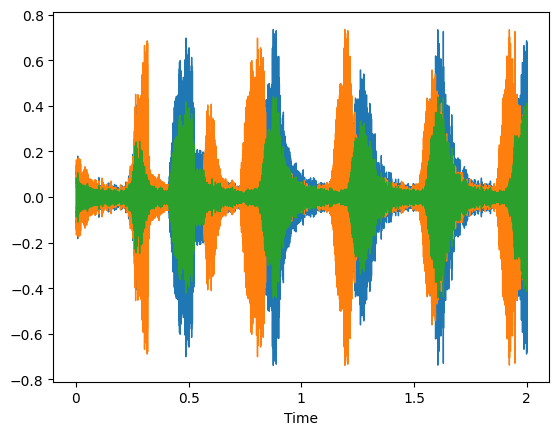

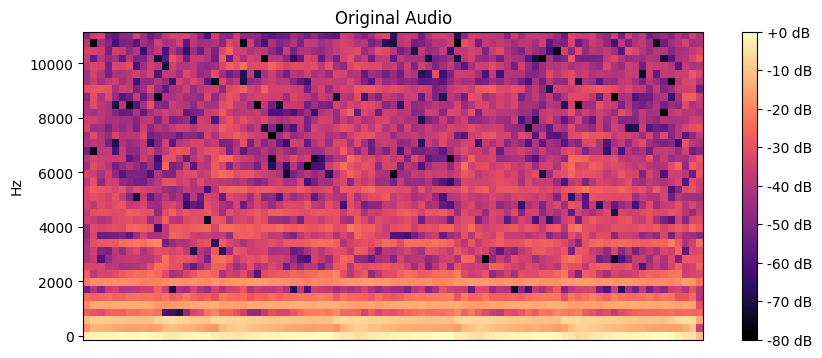

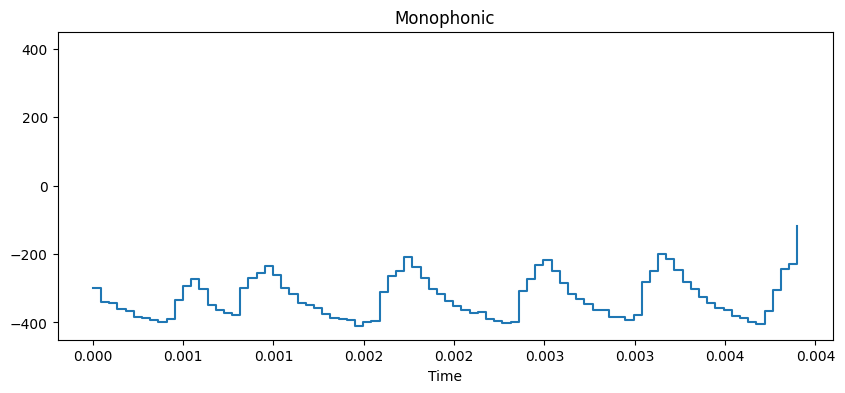

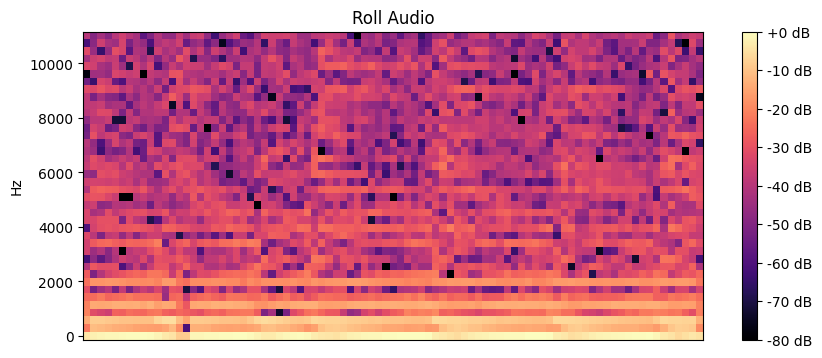

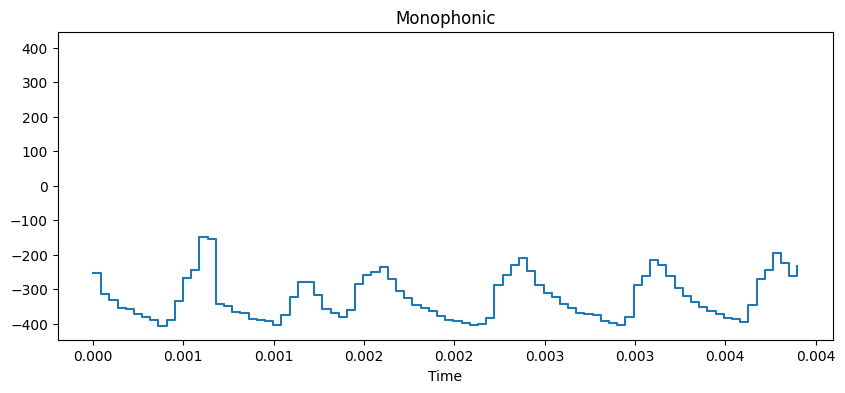

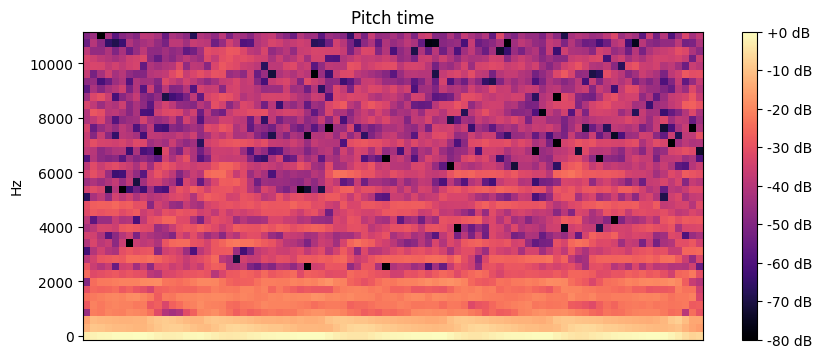

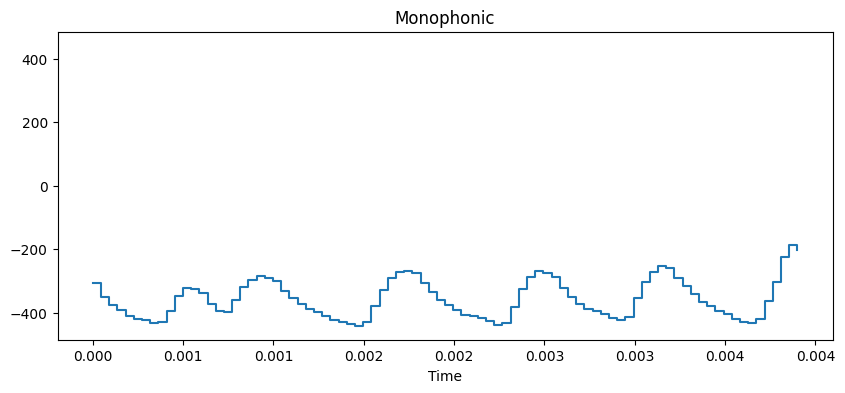

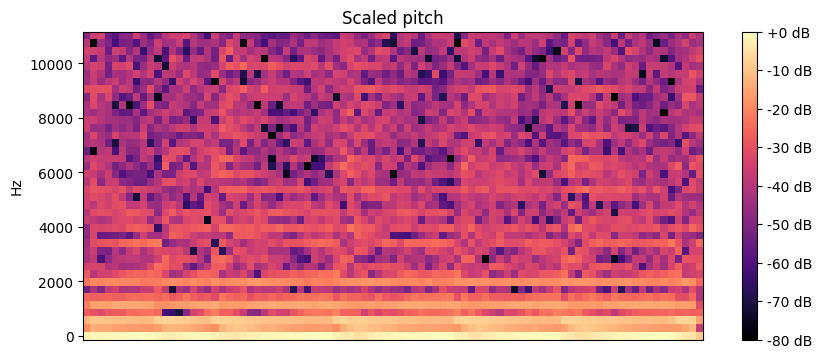

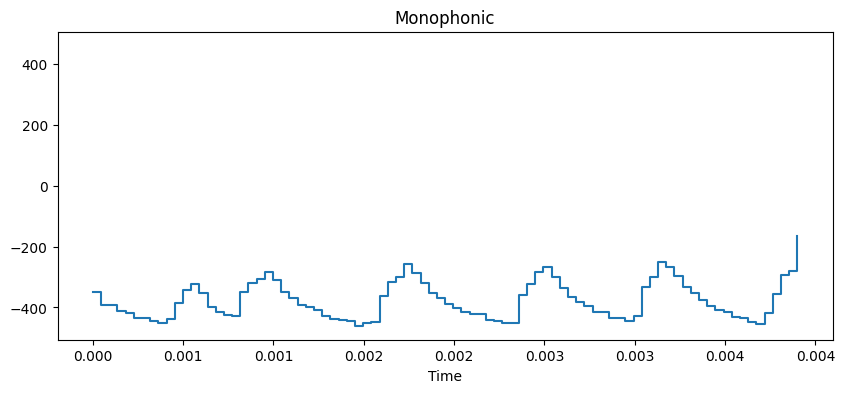

In [54]:
N_FFT = 1024
HOP_SIZE = 1024
N_MELS = 128
WIN_SIZE = 1024
WINDOW_TYPE = "hann"
FEATURE = "mel"
FMIN = 0


signal, sr = librosa.load(random_path)  # sr = sampling rate
librosa.display.waveshow(signal, sr=sr) 

# roll time
y_roll = np.roll(signal, 7000)
librosa.display.waveshow(y_roll, sr=sr)

#shift
y_pitch = librosa.effects.pitch_shift(signal, sr=sr, n_steps=4)
# librosa.display.waveshow(y_pitch, sr=sr)

# Changing pitch
y_scaled = 0.6 * signal  # Reducir la amplitud en un 40%
librosa.display.waveshow(y_scaled, sr=sr)


audio = librosa.audio = librosa.feature.mfcc(

        y=signal,
        sr=sr,
            n_mfcc=40,
            n_fft=N_FFT,
            hop_length=512,
            n_mels=N_MELS,
            htk=True,
            fmin=FMIN,
            fmax=sr / 2,
)
y_roll = librosa.audio = librosa.feature.mfcc(

        y=y_roll,
        sr=sr,
            n_mfcc=40,
            n_fft=N_FFT,
            hop_length=512,
            n_mels=N_MELS,
            htk=True,
            fmin=FMIN,
            fmax=sr / 2,
)
y_pitch = librosa.audio = librosa.feature.mfcc(

        y=y_pitch,
        sr=sr,
            n_mfcc=40,
            n_fft=N_FFT,
            hop_length=512,
            n_mels=N_MELS,
            htk=True,
            fmin=FMIN,
            fmax=sr / 2,
)
y_scaled = librosa.audio = librosa.feature.mfcc(
        y=y_scaled,
        sr=sr,
            n_mfcc=40,
            n_fft=N_FFT,
            hop_length=512,
            n_mels=N_MELS,
            htk=True,
            fmin=FMIN,
            fmax=sr / 2,
)


plt.figure(figsize=(10, 4))
librosa.display.specshow(
    librosa.power_to_db(audio**2, ref=np.max), fmin=FMIN, y_axis="linear"
)
plt.colorbar(format="%+2.0f dB")
plt.title("Original Audio")
plt.show()

plt.figure(figsize=(10, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title("Monophonic")
plt.show()

plt.figure(figsize=(10, 4))
librosa.display.specshow(
    librosa.power_to_db(y_roll**2, ref=np.max), fmin=FMIN, y_axis="linear"
)
plt.colorbar(format="%+2.0f dB")
plt.title("Roll Audio")
plt.show()

plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_roll, sr=sr)
plt.title("Monophonic")
plt.show()

plt.figure(figsize=(10, 4))
librosa.display.specshow(
    librosa.power_to_db(y_pitch**2, ref=np.max), fmin=FMIN, y_axis="linear"
)
plt.colorbar(format="%+2.0f dB")
plt.title("Pitch time")
plt.show()

plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_pitch, sr=sr)
plt.title("Monophonic")
plt.show()

plt.figure(figsize=(10, 4))
librosa.display.specshow(
    librosa.power_to_db(y_scaled**2, ref=np.max), fmin=FMIN, y_axis="linear"
    )
plt.colorbar(format="%+2.0f dB")
plt.title("Scaled pitch")
plt.show()
            
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y_scaled, sr=sr)
plt.title("Monophonic")
plt.show()


In [ ]:
# Los MFCC capturan las características acústicas más importantes y discriminativas del audio
# y se ha demostrado que son efectivos para identificar patrones acústicos en diferentes tipos de sonidos

# El parámetro hop_length controla el desplazamiento o paso entre las ventanas de tiempo en el cálculo del espectrograma o de las características de audio

#  Un número mayor de bandas mel (un valor más alto de n_mels) 
# proporcionará una representación más detallada y permitirá capturar mejor las características sutiles del canto de las aves.

# el parámetro n_fft se utiliza en la función librosa.feature.mfcc() para especificar el tamaño de la transformada de Fourier de tiempo corto (STFT) 
# que se utilizará para calcular los coeficientes cepstrales en frecuencia de Mel (MFCC)



In [16]:
def createSpectogramVector(signal, sr):
    # Plot mel-spectrogram with high-pass filter
    N_FFT = 1024
    HOP_SIZE = 1024
    N_MELS = 128
    WIN_SIZE = 1024
    WINDOW_TYPE = "hann"
    FEATURE = "mel"
    FMIN = 0

    spectrogram = librosa.feature.mfcc(
        y=signal,
        sr=sr,
        n_mfcc=40,
        n_fft=N_FFT,
        hop_length=512,
        n_mels=N_MELS,
        htk=True,
        fmin=FMIN,
        fmax=sr / 2,
)
    min_value = np.min(spectrogram)
    max_value = np.max(spectrogram)
    normalized_spectrogram = (spectrogram - min_value) / (max_value - min_value)
    return normalized_spectrogram

In [232]:
data_training = []
for index, row in df.iterrows():
    path = row["path"]
    label = row["label"]
    if label not in [
        "Amazona Autamnails",
        "Psittacara erythrogenys",
        "Ortalis erythroptera",
    ]:
        signal, sr = librosa.load(path)  # sr = sampling rate
        # signal = nr.reduce_noise(y=signal, y_noise=signal, prop_decrease=1, sr=sr)

        # Aplicar las transformaciones a la señal de audio
        y_roll = np.roll(signal, 7000)
        y_pitch2 = librosa.effects.pitch_shift(signal, sr=sr, n_steps=5)

        y_scaled = 0.6 * signal  # Reducir la amplitud en un 40%

        # Crear los espectrogramas para las señales transformadas
        
        if label == 'Pseudastur occidentalis':
            pitchspectogram2 = createSpectogramVector(signal=y_pitch2, sr=sr)
            data_training.append([pitchspectogram2, label])
            
        pitchspectogram = createSpectogramVector(signal=y_roll, sr=sr)
        scaledspectogram = createSpectogramVector(signal=y_scaled, sr=sr)
        spectogram = createSpectogramVector(signal=signal, sr=sr)

        # Agregar los espectrogramas y las etiquetas al conjunto de datos
        data_training.append([spectogram, label])
        data_training.append([pitchspectogram, label])    
        data_training.append([scaledspectogram, label])
    else:
        signal, sr = librosa.load(path)  # sr = sampling rate
        signal = nr.reduce_noise(y=signal, y_noise=signal, prop_decrease=1, sr=sr)
        spectogram = createSpectogramVector(signal=signal, sr=sr)
        data_training.append([spectogram, label])

In [233]:
extraced_features_df = pd.DataFrame(data_training, columns=['Feature','Class'])
display(extraced_features_df)
print(extraced_features_df['Class'].value_counts())

,Feature,Class
0,"[[-7.226362, -6.6173463, -6.13845, -5.542912, ...",Amazona Autamnails
1,"[[-6.380044, -5.883391, -5.5954847, -5.352064,...",Amazona Autamnails
2,"[[-3.9763107, -4.128714, -3.5429742, -3.937648...",Amazona Autamnails
3,"[[-7.9940643, -4.6567473, -4.868419, -5.605272...",Amazona Autamnails
4,"[[-3.600999, -3.6288917, -3.5774512, -3.237773...",Amazona Autamnails
...,...,...
3013,"[[-5.592979, -5.0854154, -4.827904, -4.7900357...",Psittacara erythrogenys
3014,"[[-7.8186617, -7.045013, -6.8751974, -6.803108...",Psittacara erythrogenys
3015,"[[-7.260023, -6.8629885, -6.466274, -6.388051,...",Psittacara erythrogenys
3016,"[[-6.8639417, -7.2752786, -7.392545, -7.517116...",Psittacara erythrogenys


Class
Amazona Autamnails            682
Campephilus gayaquilensis     561
Psittacara erythrogenys       522
Crypturellus tansfasciatus    495
Ortalis erythroptera          402
Pseudastur occidentalis       356
Name: count, dtype: int64


In [235]:
DROP = []
for ind in extraced_features_df.index:
    # print(extraced_features_df['Feature'][ind].shape)
    if(extraced_features_df['Feature'][ind].shape != (40,87)):
        DROP.append(ind)
        print(extraced_features_df['Feature'][ind].shape, extraced_features_df['Class'][ind])
extraced_features_df = extraced_features_df.drop(DROP)

In [236]:
extraced_features_df

,Feature,Class
0,"[[-7.226362, -6.6173463, -6.13845, -5.542912, ...",Amazona Autamnails
1,"[[-6.380044, -5.883391, -5.5954847, -5.352064,...",Amazona Autamnails
2,"[[-3.9763107, -4.128714, -3.5429742, -3.937648...",Amazona Autamnails
3,"[[-7.9940643, -4.6567473, -4.868419, -5.605272...",Amazona Autamnails
4,"[[-3.600999, -3.6288917, -3.5774512, -3.237773...",Amazona Autamnails
...,...,...
3013,"[[-5.592979, -5.0854154, -4.827904, -4.7900357...",Psittacara erythrogenys
3014,"[[-7.8186617, -7.045013, -6.8751974, -6.803108...",Psittacara erythrogenys
3015,"[[-7.260023, -6.8629885, -6.466274, -6.388051,...",Psittacara erythrogenys
3016,"[[-6.8639417, -7.2752786, -7.392545, -7.517116...",Psittacara erythrogenys


In [237]:
X = np.array(extraced_features_df['Feature'].tolist())
unique_categories = extraced_features_df['Class'].unique()
category_to_numeric = {category: i for i, category in enumerate(unique_categories)}
extraced_features_df['Class_numeric'] = extraced_features_df['Class'].map(category_to_numeric)
categorical_labels =  tf.keras.utils.to_categorical(extraced_features_df['Class_numeric'], num_classes=len(unique_categories))
train_audios,test_audios,train_target,test_target = train_test_split(X,categorical_labels,test_size=0.2,shuffle=True)


In [239]:
# modelCNN = tf.keras.Sequential([
#     tf.keras.layers.Conv2D(32, (3, 3), activation='relu',padding='same', input_shape=(train_audios.shape[1],train_audios.shape[2],1)),
#     tf.keras.layers.Dropout(0.5),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same',),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Conv2D(128, (3, 3), activation='relu' , padding='same',),
#     tf.keras.layers.MaxPooling2D((2, 2)),
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(128, activation='relu', kernel_regularizer= tf.keras.regularizers.L2(0.01)),  # Agregar regularización L2
#     tf.keras.layers.Dropout(0.25),
#     tf.keras.layers.Dense(len(unique_categories), activation='softmax')
# ])

In [ ]:
modelCNN = tf.keras.Sequential(name='Bird_Recognition_Prosperina_CNN')
# modelCNN.add(tf.keras.layers.Input(shape=(40,1), name='input_embedding'))
modelCNN.add(tf.keras.layers.Input(shape= (train_audios.shape[1],train_audios.shape[2],1), name='input_embedding'))
modelCNN.add(tf.keras.layers.Normalization())
# modelCNN.add(tf.keras.layers.Resizing(32,32))
modelCNN.add(tf.keras.layers.Conv2D(32, (3,3),padding='same', activation='relu',name='Conv1'))
modelCNN.add(tf.keras.layers.Conv2D(64, (3,3),padding='same', activation='relu',name='Conv2'))
modelCNN.add(tf.keras.layers.MaxPooling2D())
modelCNN.add(tf.keras.layers.Dropout(0.25))
modelCNN.add(tf.keras.layers.Conv2D(128, (3,3),padding='same',activation='relu',name='Conv3'))
modelCNN.add(tf.keras.layers.Conv2D(256, (3,3),padding='same',activation='relu',name='Conv4'))
modelCNN.add(tf.keras.layers.MaxPooling2D())
modelCNN.add(tf.keras.layers.Flatten())
modelCNN.add(tf.keras.layers.Dropout(0.25))
modelCNN.add(tf.keras.layers.Dense(len(unique_categories), activation='softmax', name='output'))

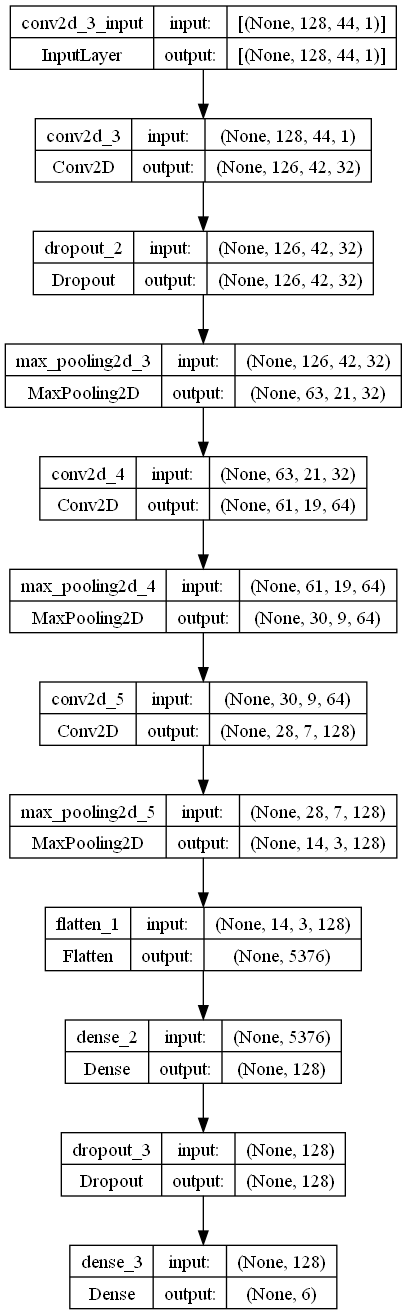

In [50]:

tf.keras.utils.plot_model(modelCNN, show_shapes=True, show_layer_names=True)

In [241]:
modelCNN.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),#from_logits=False
    metrics=["accuracy"],
)

In [242]:
log_dir = './Bird_Recognition_Page/backend/model/Bird_Recognition_Prosperina_CNN.h5'
checkpoint = ModelCheckpoint(filepath='./Bird_Recognition_Page/backend/model/Bird_Recognition_Prosperina_CNN.h5',
                             save_freq='epoch',
                             #save_weights_only=True,
                             save_best_only=True,
                             #monitor="val_accuracy",val_loss
                             monitor="val_accuracy",)


# epochs = 30
# batch_size = 128

epochs = 50
batch_size = 32
history = modelCNN.fit(
    train_audios,
    train_target,
    epochs=epochs,
    batch_size=batch_size,
    validation_data= (test_audios,
    test_target),
    steps_per_epoch=int(np.ceil(len(train_audios) / float(batch_size))),
    validation_steps=int(np.ceil(len(test_audios) / float(batch_size))),
    callbacks=[checkpoint]
)

Epoch 1/50
76/76 [==============================] - 1s 12ms/step - loss: 1.6983 - accuracy: 0.3153 - val_loss: 1.5127 - val_accuracy: 0.5058
Epoch 2/50
76/76 [==============================] - 1s 8ms/step - loss: 1.1680 - accuracy: 0.5836 - val_loss: 0.9295 - val_accuracy: 0.6972
Epoch 3/50
76/76 [==============================] - 1s 8ms/step - loss: 0.6788 - accuracy: 0.7725 - val_loss: 0.6850 - val_accuracy: 0.7737
Epoch 4/50
76/76 [==============================] - 1s 8ms/step - loss: 0.4994 - accuracy: 0.8270 - val_loss: 0.4377 - val_accuracy: 0.8569
Epoch 5/50
76/76 [==============================] - 1s 8ms/step - loss: 0.4218 - accuracy: 0.8565 - val_loss: 0.3869 - val_accuracy: 0.8918
Epoch 6/50
76/76 [==============================] - 1s 8ms/step - loss: 0.3403 - accuracy: 0.8810 - val_loss: 0.4099 - val_accuracy: 0.8469
Epoch 7/50
76/76 [==============================] - 1s 8ms/step - loss: 0.2693 - accuracy: 0.9002 - val_loss: 0.3258 - val_accuracy: 0.8918
Epoch 8/50
76/76 [=

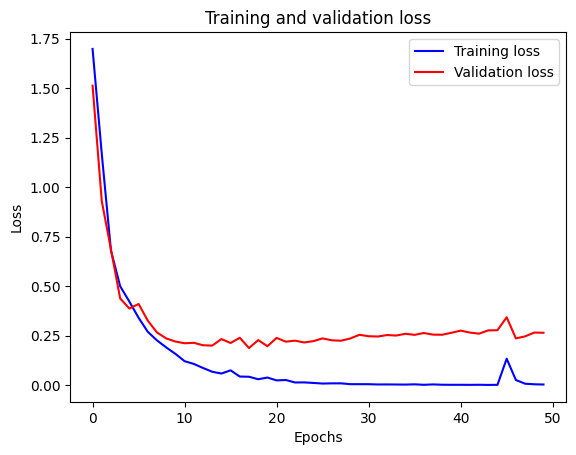

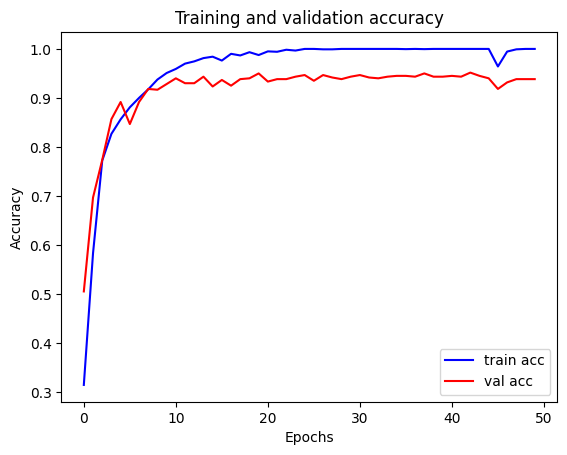

In [243]:
plt.plot(history.history["loss"], 'b',label="Training loss")
plt.plot(history.history["val_loss"], 'r', label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# plot the accuracy
plt.plot(history.history['accuracy'],'b', label='train acc')
plt.plot(history.history['val_accuracy'],'r', label='val acc')
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [11]:
log_dir = './Bird-Recognition-Page/backend/model/Bird_Recognition_Prosperina_CNN.h5'
test_model = tf.keras.models.load_model(log_dir)

In [12]:
test_model.summary()

Model: "Bird_Recognition_Prosperina_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_3 (Normalizat  (None, 40, 87, 1)        3         
 ion)                                                            
                                                                 
 Conv1 (Conv2D)              (None, 40, 87, 32)        320       
                                                                 
 Conv2 (Conv2D)              (None, 40, 87, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 20, 43, 64)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 20, 43, 64)        0         
                                                                 
 Conv3 (Conv2D)              (None,

In [ ]:
#Testing
results_train = test_model.evaluate(train_audios, train_target)
results_test  = test_model.evaluate(test_audios, test_target)

print (f"\n results_train: Loss, Accuracy ==> {results_train}")
print (f" results_test : Loss, Accuracy ==> {results_test}")

In [ ]:

predictions_values=test_model.predict(test_audios)
predictions=predictions_values.argmax(axis=1)


# Convertir las predicciones a representaciones categóricas
categorical_predictions = tf.keras.utils.to_categorical(predictions, num_classes=len(class_commonnames))

# Crear la matriz de confusión
cm = confusion_matrix(test_target.argmax(axis=1), categorical_predictions.argmax(axis=1), normalize=None)

# Crear la visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_commonnames)

# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 10))

disp.plot(cmap=plt.cm.Blues, ax=plt.gca(), xticks_rotation='vertical')
plt.title('Confusion matrix')
plt.show()

In [20]:

timeserie = 0
predictions = []
for file in os.listdir('./Audio-Environment/'):
    FILEPATH = os.path.join('./Audio-Environment/', file)
    signal, sr = librosa.load(FILEPATH)
    # signal = nr.reduce_noise(y=signal, y_noise=signal, prop_decrease=1, sr = sr)  
    audio_slices = createSegmentationVectorPredict(2,signal,sr,[])
    timeserie = datetime.timedelta(seconds=0)
    for i in range(len(audio_slices)):
        vectorMFFC=createSpectogramVector(signal=audio_slices[i], sr=sr)
        vectoresPredict = [vectorMFFC]
        prediction = np.array(vectoresPredict)
        prediction = test_model.predict(prediction)
        timeserie = timeserie + datetime.timedelta(seconds=2)        
        if(prediction.max() > 0.85):
            predictions.append((class_commonnames[prediction.argmax()],prediction.max(),timeserie))
        else:
            predictions.append(("Not Detected",prediction.max(),timeserie))
    break


1/1 [==============================] - 0s 13ms/step


In [21]:
predictions

[('Picamaderos de Guayaquil', 0.9970872, datetime.timedelta(seconds=2)),
 ('Picamaderos de Guayaquil', 0.99315214, datetime.timedelta(seconds=4)),
 ('Picamaderos de Guayaquil', 0.99618196, datetime.timedelta(seconds=6)),
 ('Picamaderos de Guayaquil', 0.9963348, datetime.timedelta(seconds=8)),
 ('Picamaderos de Guayaquil', 0.99623716, datetime.timedelta(seconds=10)),
 ('Picamaderos de Guayaquil', 0.9965598, datetime.timedelta(seconds=12))]

In [25]:
jsonPredictions = {}
# Función para calcular la votación mayoritaria
def majority_vote(predictions):
    if len(predictions) == 0:
        return 'Anomalia'
    
    unique_classes, counts = np.unique(predictions, return_counts=True)
    max_count = np.max(counts)
    
    if np.sum(counts == max_count) > 1:
        return 'Anomalia'
    
    majority_class = unique_classes[np.argmax(counts)]
    return majority_class

def time_to_seconds(time_obj):
    total_seconds = int(time_obj.total_seconds())
    return total_seconds

def seconds_to_time(seconds):
    return datetime.time(hour=seconds // 3600, minute=(seconds % 3600) // 60, second=seconds % 60)


# Calcular el número de intervalos y el tamaño del intervalo en función de la duración del audio
audio_duration = time_to_seconds(timeserie)  # Duración del audio en segundos
interval_size = 8  # Tamaño del intervalo en segundos

# Calcular el número de intervalos
num_intervals = int(np.ceil(audio_duration / interval_size))

# Dividir las predicciones en intervalos y aplicar enfoques
for i in range(num_intervals):
    start_time = i * interval_size
    end_time = (i + 1) * interval_size
    interval_predictions = []
    for pred in predictions: 
        pred_time_seconds = time_to_seconds(pred[2])
        if start_time < pred_time_seconds <= end_time:
            interval_predictions.append(pred[0])
            
    # Votación Mayoritaria
    majority_prediction = majority_vote(interval_predictions)
    if(majority_prediction == 'Not Detected' ): 
        scientificname = 'Not Detected'
    elif(majority_prediction == 'Anomalia'):
        scientificname = 'Anomalia'
    else: 
        scientificname = class_scientificnames[class_commonnames.index(majority_prediction)]

    jsonPredictions[file + '/' +seconds_to_time(start_time).strftime("%H:%M:%S")] = [
                        majority_prediction,
                        scientificname,
                        seconds_to_time(start_time).strftime("%H:%M:%S"),
                        seconds_to_time(end_time).strftime("%H:%M:%S"),
                ]

# Procesar el último intervalo si su tiempo excede el límite final
if end_time > audio_duration:
    last_start_time = start_time
    last_interval_predictions = []
    for pred in predictions: 
        pred_time_seconds = time_to_seconds(pred[2])
        if last_start_time <= pred_time_seconds <= audio_duration:
            last_interval_predictions.append(pred[0])

    # Votación Mayoritaria
    majority_prediction = majority_vote(last_interval_predictions)
    if(majority_prediction == 'Not Detected' ): 
        scientificname = 'Not Detected'
    elif(majority_prediction == 'Anomalia'):
        scientificname = 'Anomalia'
    else: 
        scientificname = class_scientificnames[class_commonnames.index(majority_prediction)]
    
    jsonPredictions[file + '/' +seconds_to_time(last_start_time).strftime("%H:%M:%S")] = [
                        majority_prediction,
                        scientificname,
                        seconds_to_time(last_start_time).strftime("%H:%M:%S"),
                        seconds_to_time(audio_duration).strftime("%H:%M:%S"),
            ]
print(jsonPredictions)


{'Aratinga AUDIO.wav/00:00:00': ['Picamaderos de Guayaquil', 'Campephilus gayaquilensis', '00:00:00', '00:00:08'], 'Aratinga AUDIO.wav/00:00:08': ['Picamaderos de Guayaquil', 'Campephilus gayaquilensis', '00:00:08', '00:00:12']}
